This is a tutorial on folding pulsar signals. 

Inspired by Peter Ma's version on github (https://github.com/PetchMa/Pulsar_Folding)

# Install the software

In [1]:
!pip install blimpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


# Download the data

In [2]:
!wget http://blpd13.ssl.berkeley.edu/borisov/AGBT19B_999_124/spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil


--2024-06-21 16:23:00--  http://blpd13.ssl.berkeley.edu/borisov/AGBT19B_999_124/spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil
Resolving blpd13.ssl.berkeley.edu (blpd13.ssl.berkeley.edu)... 208.68.240.55
Connecting to blpd13.ssl.berkeley.edu (blpd13.ssl.berkeley.edu)|208.68.240.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8776581466 (8.2G) [application/octet-stream]
Saving to: ‘spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil’

spliced_blc40414243 100%[===================>]   8.17G  19.0MB/s    in 9m 6s   

2024-06-21 16:32:08 (15.3 MB/s) - ‘spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil’ saved [8776581466/8776581466]



# Reading the header information

In [1]:
from blimpy import Waterfall

obs = Waterfall('spliced_blc40414243444546o7o0515253545556o7o061626364656667_guppi_58837_86186_PSR_B0355+54_0013.gpuspec.8.0001.fil', 
               t_start=0,t_stop= 80000,max_load=10)

data = obs.data

obs.info()

##  Question 1: how long (in seconds) is the duration of this observation? 
    
Hint: you can use `obs.header['tsamp']` to get the sampling rate and `data.shape[0]` to get the total number of samples.


In [3]:
print('sampling rate is:',obs.header['tsamp'])
print('total number of samples is:',data.shape[0])

#Your code here to calculate the duration in seconds
#...

sampling rate is: 0.0003495253333333333
total number of samples is: 80000


## Question 2: how wide is the the bandwidth of the observation? 

Hint: you can use `obs.header['foff']` to get the the frequency resolution of the data, and `data.shape[2]` to get the total number of channels 
 

In [5]:
print('frequency resolution is:', obs.header['foff'],'MHz')
print('number of frequency channels is:', data.shape[2])

#Your code here to calculate the bandwidth
#...

frequency resolution is: -0.3662109375 MHz
number of frequency channels is: 10240


# Viewing the spectrum

Text(0.5, 0, 'Time samples')

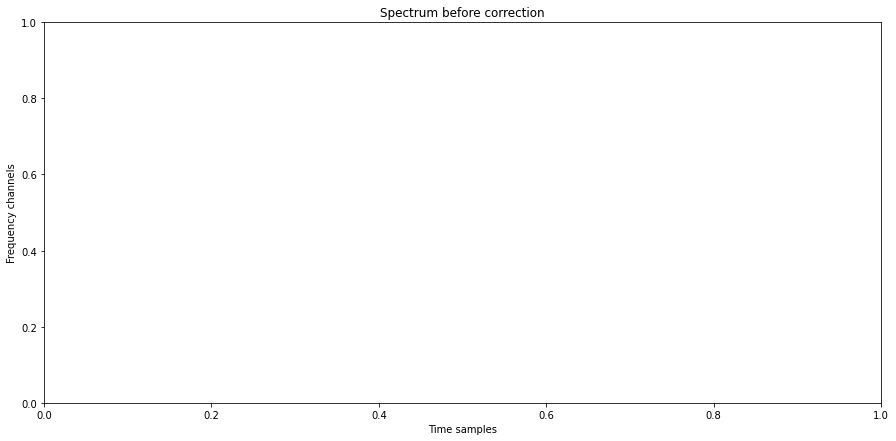

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,7))
plt.title('Spectrum before correction')
plt.ylabel("Frequency channels")
plt.xlabel("Time samples")
plt.imshow(data[:,0,:].T, aspect='auto')
plt.colorbar()

matplotlib.legend WARNING  No handles with labels found to put in legend.


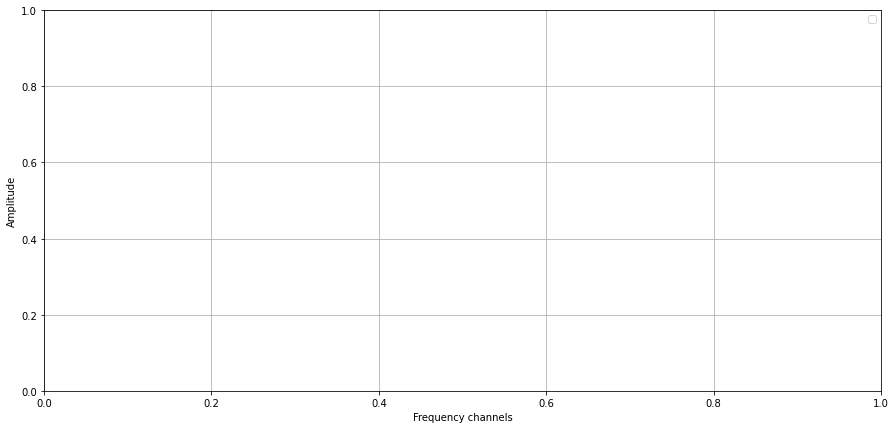

In [4]:
Bandpass = data[:,0,:].mean(axis=0)

fig = plt.figure(figsize=(15,7))
plt.plot(Bandpass,label='original data')
plt.xlabel('Frequency channels')
plt.ylabel('Amplitude')
plt.legend(loc=0)
plt.grid()

# Bandpass removal using spline fitting

## Question 3: what is an appropriate spline fit interval? 

Hint: look at the bandpass plot above to choose the interval based on the modulation of the data

In [8]:
import numpy as np
from scipy.interpolate import LSQUnivariateSpline

data_corrected = np.zeros(data.shape)

#Here input your interval
#...
spl_interval = 

knot_positions = np.arange(spl_interval/2, data.shape[2]-spl_interval/2, spl_interval)
x = np.arange(0,data.shape[2])
spline = LSQUnivariateSpline(x, Bandpass,knot_positions, k=1)
y_fit = spline(x)

for i in range(data.shape[0]):
    data_corrected[i,0,:]  = data[i,0,:] - y_fit


Text(0.5, 0, 'Time samples')

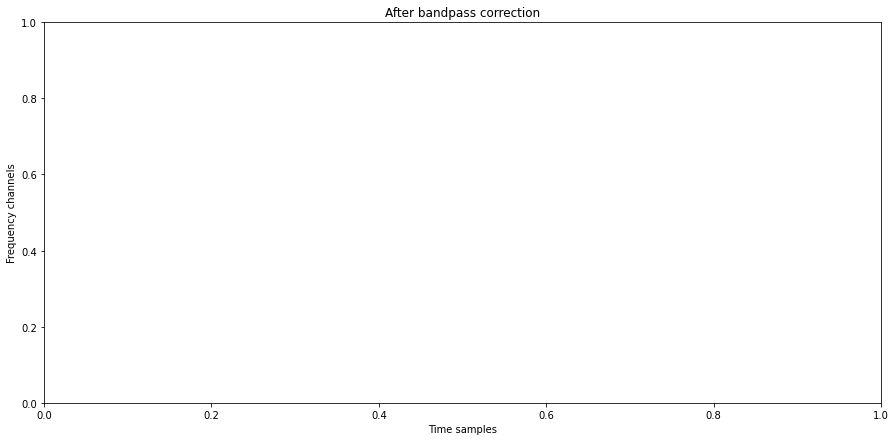

In [5]:
#Visualize the corrected data 
fig = plt.figure(figsize=(15,7))
plt.title('After bandpass correction')
plt.imshow(data_corrected[0:1000,0,:].T, aspect='auto')
plt.ylabel('Frequency channels')
plt.xlabel("Time samples")
plt.colorbar()

matplotlib.legend WARNING  No handles with labels found to put in legend.


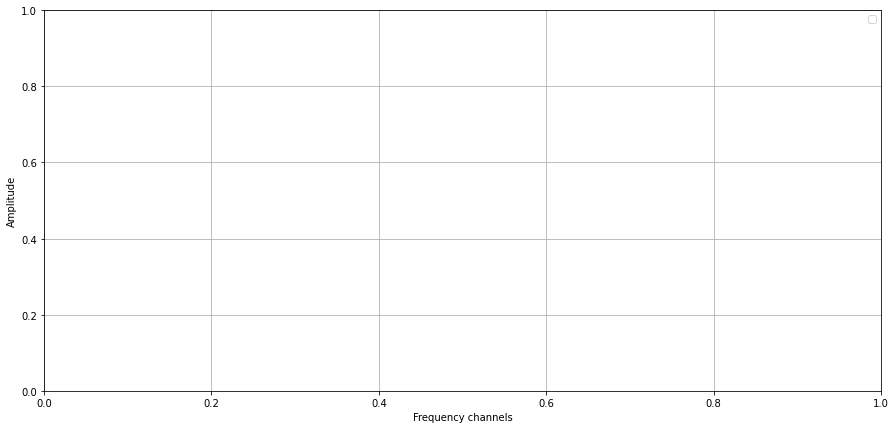

In [6]:
#Visualize the split fit
fig = plt.figure(figsize=(15,7))
plt.plot(Bandpass[0:2000],label='original data')
plt.plot(y_fit[0:2000],label='spl_interval='+str(spl_interval))
plt.xlabel('Frequency channels')
plt.ylabel('Amplitude')
plt.legend(loc=0)
plt.grid()

matplotlib.legend WARNING  No handles with labels found to put in legend.


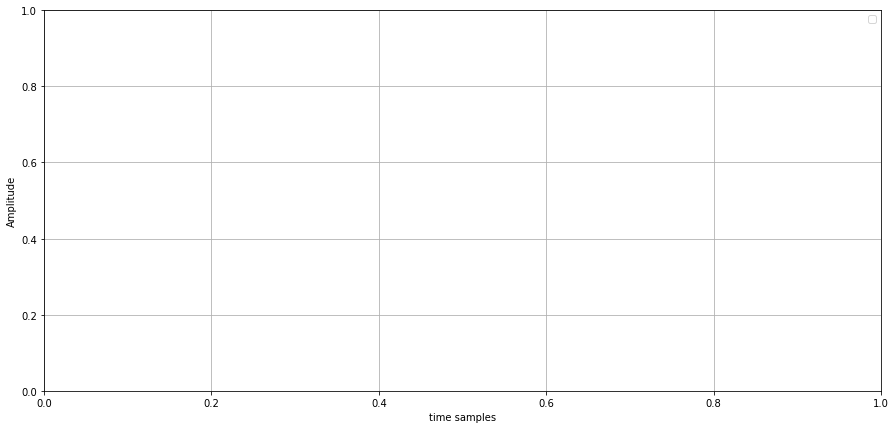

In [10]:
#Plot the time series to see the pulses
TimeSeries_corrected = data_corrected.mean(axis=2)

fig = plt.figure(figsize=(15,7))
plt.plot(TimeSeries_corrected[0:10000])
plt.xlabel("time samples")
plt.ylabel("Amplitude")
plt.legend(loc=0)
plt.grid()

# Guessing the period and folding the data

## Question 4: what do you think period is ? 
Enter it below and we will try to fold the data

In [12]:
period = 

In [13]:
from scipy import stats 

fold = np.zeros((period, data.shape[2]))
print("Folded data shape (phase bin x freq chan)", np.shape(fold))
multiples = int(data.data.shape[0]/period)
print('No. of folded periods', multiples)
results = np.zeros((period))

output = np.zeros((multiples-1, period))

for i in range(multiples-1):
  fold[:,:]=data_corrected[i*period:(i+1)*period,0,:]+ fold
  results = fold.mean(axis=1) #Sum along frequency axis
  results = results - results.min() #Move baseline to around 0
  output[i,:] = results

Folded data shape (phase bin x freq chan) (200, 10240)
No. of folded periods 400


(399, 200)


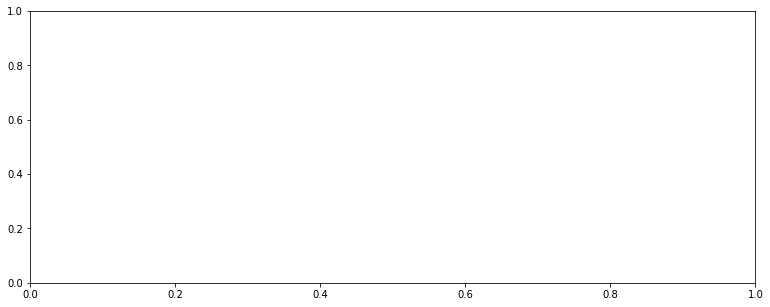

In [14]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(13,5)

print(output.shape)
def animate(i):
    ax.clear()
    point = output[i,:]
    ax.plot(point)
    ax.set_xlabel('Phase bins')
    ax.set_ylabel('Amplitude')
    plt.grid()
    
ani = FuncAnimation(fig, animate, frames=multiples-1,
                    interval=100, repeat=False)
ani

# More accurately determine the period using Fourier Transform

In [16]:
def FindPeakIndex(arr, ncand = 10):
  candidate = []
  arr2 = arr.copy() #make a copy of the data so we can still plot yf outside
  for i in range(ncand):
    index = np.argmax(arr2)
    candidate.append(index+1)     # We add 1 as the 0th index = period of 1 not 0
    arr2[index]=0   #replace that bin by zero so next time it doesn't get counted
  return candidate  
 

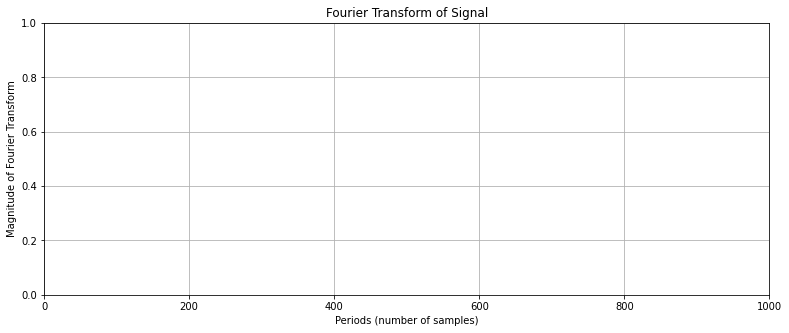

Most likely Candidates are: [1, 895, 79107, 716, 79286, 180, 79822, 537, 79465, 1074, 78928, 1610, 78392, 359, 79643]


In [17]:
#  Preforming the fourier transform.
import scipy.fftpack
from scipy.fft import fft

y = abs(TimeSeries_corrected.reshape(-1))
yf = np.abs(fft(y))

ncand = 15
candidates = FindPeakIndex(yf, ncand=ncand)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(13,5)

xlim = 1000
plt.plot(yf[0:xlim])
for i in range(ncand):
    plt.scatter(candidates[i]-1,yf[candidates[i]-1],c='r',marker='o')
plt.grid()
plt.title('Fourier Transform of Signal')
plt.xlim(0,xlim)
plt.xlabel("Periods (number of samples)")
plt.ylabel("Magnitude of Fourier Transform")
plt.show()

print("Most likely Candidates are: "+str(candidates))

# Folding the data by the period determined

In [30]:
period = candidates[1]
fold = np.zeros((period, data.shape[2]))
print("Folded data shape (phase bin x freq chan)", np.shape(fold))
multiples = int(data.data.shape[0]/period)
print('No. of folded periods', multiples)
results = np.zeros((period))

output = np.zeros((multiples-1, period))

for i in range(multiples-1):
  fold[:,:]=data[i*period:(i+1)*period,0,:]+ fold
  results = fold.mean(axis=1) #Sum along frequency axis
  results = results - results.min() #Move baseline to around 0
  output[i,:] = results

Folded data shape (phase bin x freq chan) (895, 10240)
No. of folded periods 89


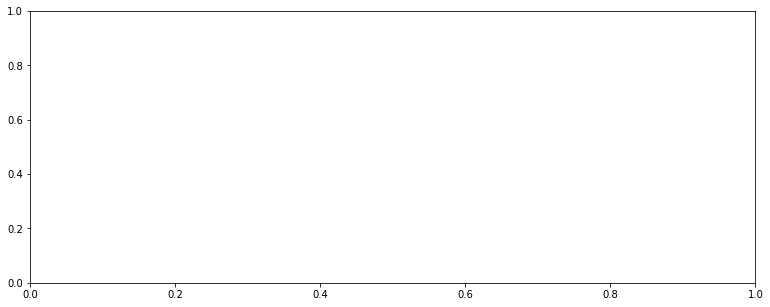

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(13,5)
    
ani = FuncAnimation(fig, animate, frames=multiples-1,
                    interval=100, repeat=False)
ani

## Question 5: So what is the corresponding period in seconds we just folded? 
    
Hint: you will need to use candidates[1] and obs.header['tsamp'] for the conversion.


In [22]:
folded_P = 

print("Folded period is ", folded_P, " seconds")

SyntaxError: invalid syntax (<ipython-input-22-77ea6bb8fd59>, line 1)

# Check the catalogue period

Go to the website https://www.atnf.csiro.au/research/pulsar/psrcat/ and enter the period below

## Question 6: Are the true period the same as the one we folded with? If not, why not?